In [ ]:
import tensorflow as tf
import pandas as pd 
import zipfile as zp
import numpy as np
import os
import seaborn as sns

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv(" Enter the File path")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

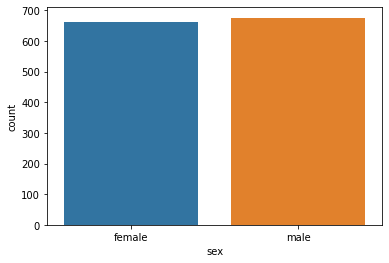

In [ ]:
sns.countplot(x="sex",data=insurance)

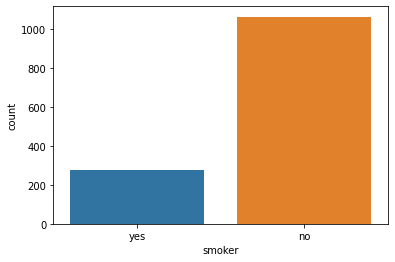

In [ ]:
sns.countplot(x="smoker",data=insurance)

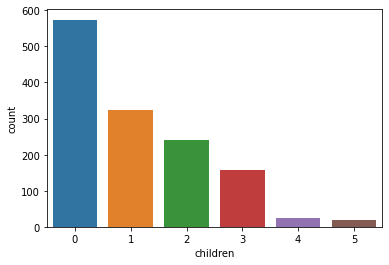

In [ ]:
sns.countplot(x="children",data=insurance)

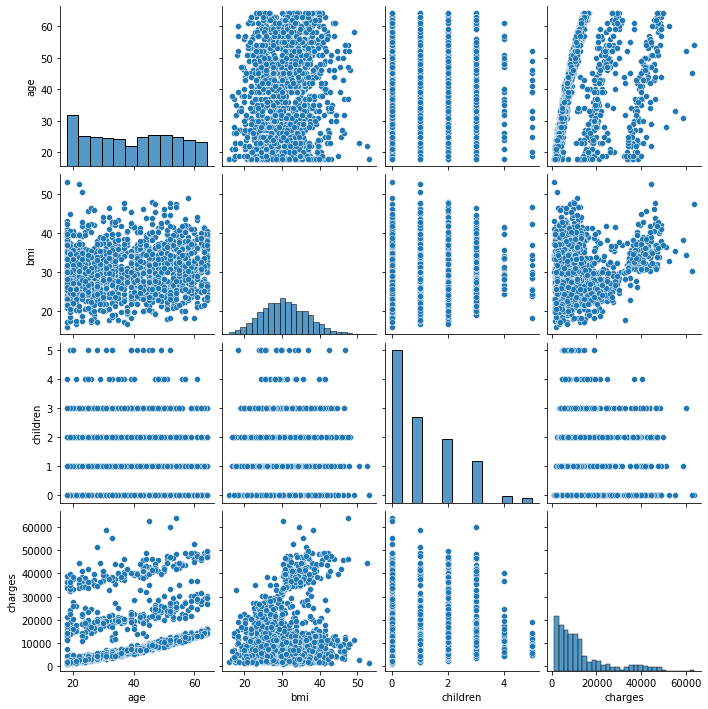

In [ ]:
sns.pairplot(insurance)
plt.show()

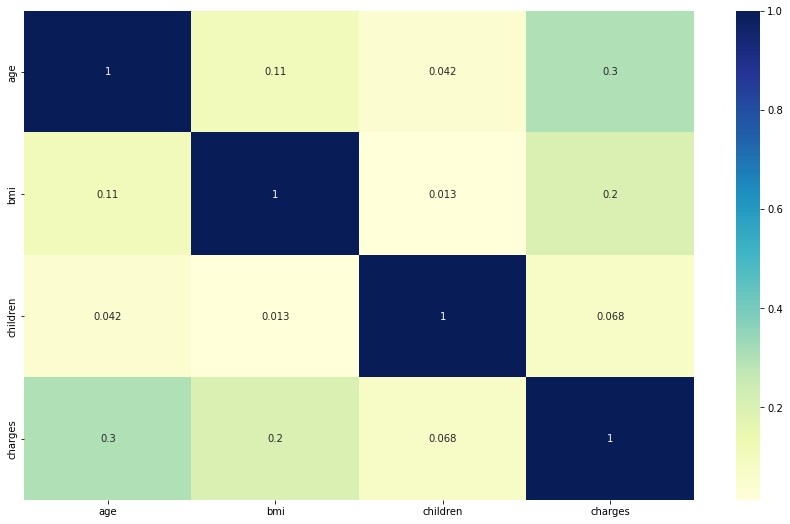

In [ ]:
##Heatmap
correlations = insurance.corr()
index=correlations.index
plt.figure(figsize=(15,9))
sns.heatmap(insurance[index].corr(),annot=True,cmap="YlGnBu")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#create column trasnformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create x & y
x = insurance.drop("charges",axis = 1)
y = insurance["charges"]

#Build our train and test sets()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#Fit column transformer on the trainning data only.(doing so on test data would result in data leakage)
ct.fit(x_train)

#Transform trainning and test_data with normalization (MinMaxScaler) and one hot encoding(OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train.loc[1] #Checking the data

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object

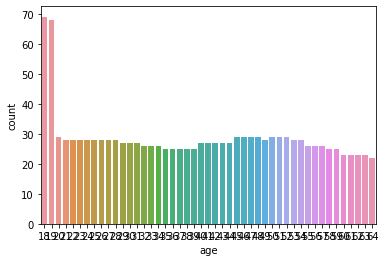

In [ ]:
sns.countplot(x="age",data=insurance)

In [ ]:
#set random seed
tf.random.set_seed(42)

#Build the model(3 layers, 100,10,1 )
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile
model_insurance.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# Fit the model for 200 epochs
history_insurance = model_insurance.fit(x_train_normal,y_train,epochs=250)

Epoch 1/250
34/34 [==============================] - 1s 4ms/step - loss: 13338.4629 - mae: 13338.4629
Epoch 2/250
34/34 [==============================] - 0s 5ms/step - loss: 13209.2461 - mae: 13209.2461
Epoch 3/250
34/34 [==============================] - 0s 5ms/step - loss: 12459.1230 - mae: 12459.1230
Epoch 4/250
34/34 [==============================] - 0s 4ms/step - loss: 10317.1055 - mae: 10317.1055
Epoch 5/250
34/34 [==============================] - 0s 5ms/step - loss: 8240.9082 - mae: 8240.9082
Epoch 6/250
34/34 [==============================] - 0s 7ms/step - loss: 7791.6758 - mae: 7791.6758
Epoch 7/250
34/34 [==============================] - 0s 7ms/step - loss: 7574.0547 - mae: 7574.0547
Epoch 8/250
34/34 [==============================] - 0s 6ms/step - loss: 7341.1045 - mae: 7341.1045
Epoch 9/250
34/34 [==============================] - 0s 5ms/step - loss: 7080.9185 - mae: 7080.9185
Epoch 10/250
34/34 [==============================] - 0s 5ms/step - loss: 6768.2651 - mae: 6

In [ ]:
evaluated_value = model_insurance.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1751.7205 - mae: 1751.7205


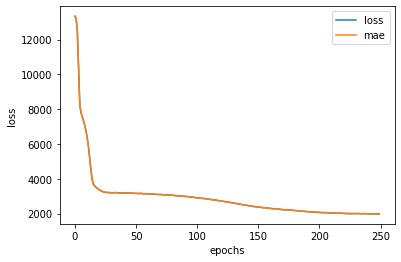

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_insurance.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
predicted_value = model_insurance.predict(x_test_normal)
predicted_values_train = model_insurance(x_train_normal)

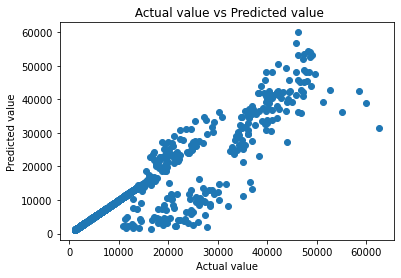

In [ ]:
plt.scatter(y_train, predicted_values_train)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title(" Actual value vs Predicted value")
plt.show()

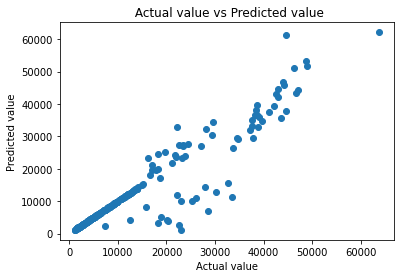

In [ ]:
plt.scatter(y_test, predicted_value)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title(" Actual value vs Predicted value")
plt.show()